In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
!pip install yfinance ta

In [3]:
import yfinance as yr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

ticker = '2330.TW'
df = yr.download(ticker, start='2021-01-01', end='2025-01-01')
print(df.head())
print(df.shape)
print('查看是否有遺失值')
print(df.isnull().sum())
print('查看資料型態')
print(df.dtypes)

/tmp/ipython-input-3-2674451084.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yr.download(ticker, start='2021-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2021-01-04  496.154816  499.857464  488.749520  490.600844  38770328
2021-01-05  501.708771  501.708771  495.229137  496.154799  34411866
2021-01-06  508.188354  513.742326  500.783060  513.742326  53030554
2021-01-07  522.998901  527.627210  511.890960  512.816622  51166782
2021-01-08  536.883850  536.883850  528.552894  536.883850  59563555
(970, 5)
查看是否有遺失值
Price   Ticker 
Close   2330.TW    0
High    2330.TW    0
Low     2330.TW    0
Open    2330.TW    0
Volume  2330.TW    0
dtype: int64
查看資料型態
Price   Ticker 
Close   2330.TW    float64
High    2330.TW    float64
Low     2330.TW    float64
Open    2330.TW    float64
Volume  2330.TW      int64
dtype: object


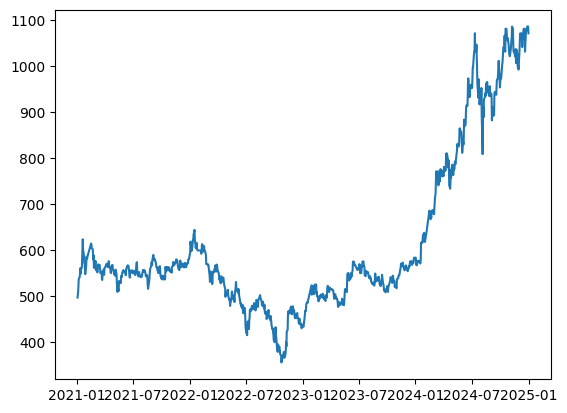

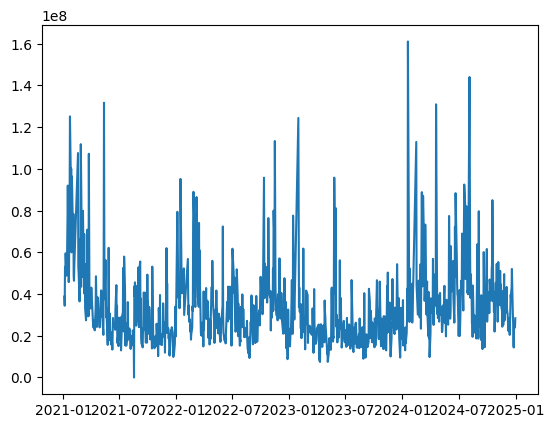

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()
plt.plot(df['Volume'])
plt.show()

In [5]:
print('擬進行推算，了解資料變化')
print('移動平均')
df1 = df.copy()
sma = ta.trend.SMAIndicator(df['Close'], window = 5)
print(df1.head())
print(df1.shape)
print(df1.head())
print(df1.shape)

擬進行推算，了解資料變化
移動平均
Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2021-01-04  496.154816  499.857464  488.749520  490.600844  38770328
2021-01-05  501.708771  501.708771  495.229137  496.154799  34411866
2021-01-06  508.188354  513.742326  500.783060  513.742326  53030554
2021-01-07  522.998901  527.627210  511.890960  512.816622  51166782
2021-01-08  536.883850  536.883850  528.552894  536.883850  59563555
(970, 5)
Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2021-01-04  496.154816  499.857464  488.749520  490.600844  38770328
2021-01-05  501.708771  501.708771  495.229137  496.154799  34411866
2021-01-06  508.188354  513.742326  500.783060  513.742326  53030554
2021-01

因為原本資料的日期時間與dataFrame的日期時間格式不對，所以要做設定
原本的01.01.2009 00:20:00
Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2021-01-04  496.154816  499.857464  488.749520  490.600844  38770328
2021-01-05  501.708771  501.708771  495.229137  496.154799  34411866
2021-01-06  508.188354  513.742326  500.783060  513.742326  53030554
2021-01-07  522.998901  527.627210  511.890960  512.816622  51166782
2021-01-08  536.883850  536.883850  528.552894  536.883850  59563555
DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-24', '2024-12-25', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'

/tmp/ipython-input-6-2744522907.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df2 = df1.groupby(pd.Grouper(freq='Q')).mean()


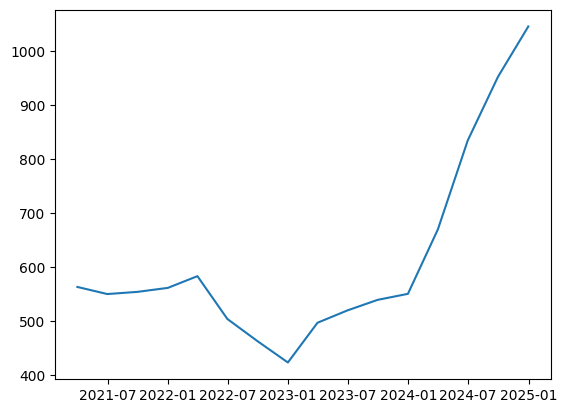

In [6]:
df1.index = pd.to_datetime(df1.index, format='%d.%m.%Y %H:%M:%S')
print('因為原本資料的日期時間與dataFrame的日期時間格式不對，所以要做設定')
print('原本的01.01.2009 00:20:00')
print(df1.head())
print(df1.index)
df2 = df1.groupby(pd.Grouper(freq='Q')).mean()
print(df2.head())
print(df2.shape)

import matplotlib.pyplot as plt
plt.plot(df2['Close'])
plt.show()

                      T
Date                   
2021-01-04   496.154816
2021-01-05   501.708771
2021-01-06   508.188354
2021-01-07   522.998901
2021-01-08   536.883850
...                 ...
2024-12-25  1080.415527
2024-12-26  1080.415527
2024-12-27  1085.394287
2024-12-30  1085.394287
2024-12-31  1070.457764

[970 rows x 1 columns]
T    False
dtype: bool


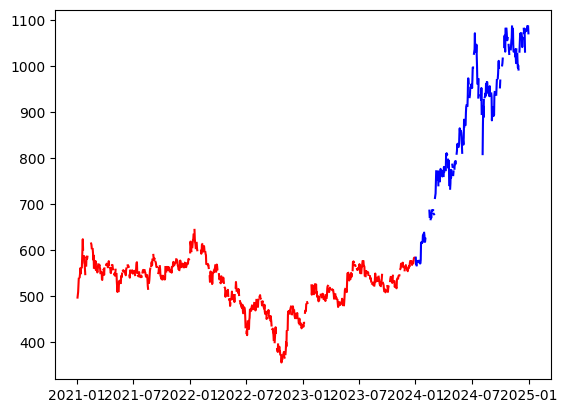

1090
365


In [7]:
df5 = pd.DataFrame()
df5['T'] = df1['Close']
print(df5)
print(df5.isnull().any())

# 以下資料是機器學習中的X，y得另外抓取
train1A = df5[df5.index < '2023-12-31']
test1A = df5[df5.index >= '2023-12-31']
train1B = train1A.resample('D').mean()
test1B = test1A.resample('D').mean()
plt.plot(train1B, c='r')
plt.plot(test1B, c='b')
plt.show()
print(len(train1B))
print(len(test1B))

In [8]:
list1 = []
list2 = []

for i in range(len(train1B['T'])):
  try:
    list1.append(float(train1B.iloc[i].values))
    list2.append(float(train1B.iloc[i + 1].values))
  except:
    pass

list1.pop(-1)
list3 = []
list4 = []

for i in range(len(test1B['T'])):
  try:
    list3.append(float(test1B.iloc[i].values))
    list4.append(float(test1B.iloc[i + 1].values))
  except:
    pass

list3.pop(-1)

1070.457763671875

In [9]:
list5 = list1 + list3
list6 = list2 + list4
train1 = pd.DataFrame()
train1['X'] = list5
train1['y'] = list6
X = train1[['X']]
y = train1[['y']]
X.dropna(axis = 0, how='any', inplace = True)
y.dropna(axis = 0, how='any', inplace = True)
print('我們要將資料切割為訓練與測試')

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3)
print(x_train1.shape)
print(y_train1.shape)

/tmp/ipython-input-9-816486046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis = 0, how='any', inplace = True)
/tmp/ipython-input-9-816486046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(axis = 0, how='any', inplace = True)


我們要將資料切割為訓練與測試
(677, 1)
(677, 1)


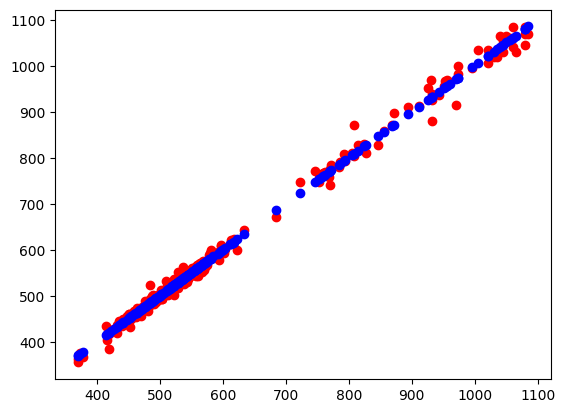

mse: 142.1440828548855
rmse: 11.922419337319313
平均絕對值誤差: 8.155556528865768
中位絕對值誤差: 5.468439443746888
r2: 0.9950815498370005


In [10]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(x_train1, y_train1)

import joblib
joblib.dump(model, 'model1A.pkl')
model1a = joblib.load('model1A.pkl')
predict = model1a.predict(x_test1)
plt.scatter(x_test1, y_test1, c='red')
plt.scatter(x_test1, predict, c='blue')
plt.show()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
print('mse:', mean_squared_error(y_test1, predict))
print('rmse:', np.sqrt(mean_squared_error(y_test1, predict)))
print('平均絕對值誤差:', mean_absolute_error(y_test1, predict))
print('中位絕對值誤差:', median_absolute_error(y_test1, predict))
print('r2:', r2_score(y_test1, predict))

242
242


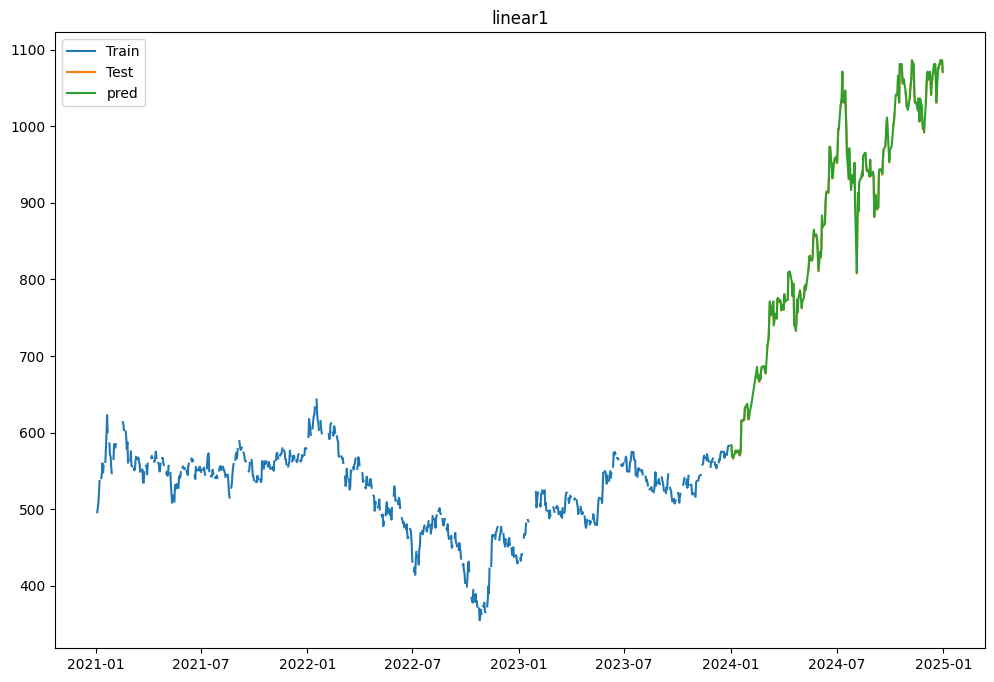

In [11]:
list7 = []

for i in range(len(test1B['T'])):
    list7.append(float(test1B.iloc[i].values))

trytopred = pd.DataFrame()
trytopred['X'] = list7
trytopred.dropna(axis = 0, how='any', inplace = True)
linear1 = test1B.copy()
linear1.dropna(axis = 0, how='any', inplace = True)
print(len(linear1))
print(len(trytopred))
y_pred = model1a.predict(trytopred)
linear1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(linear1.index, linear1['pred'], label='pred')
plt.legend(loc='best')
plt.title("linear1")
plt.show()

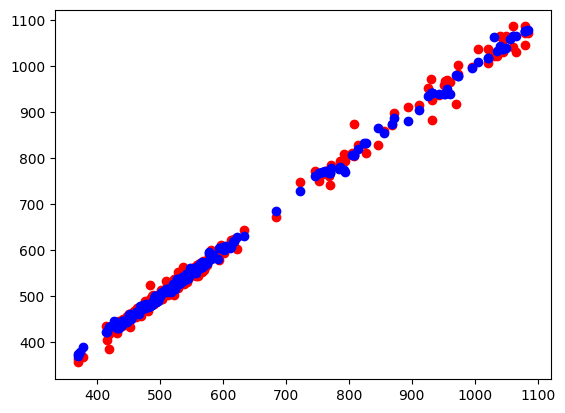

mse: 188.2664986820653
rmse: 13.721023966237553
平均絕對值誤差: 9.454646614135882
中位絕對值誤差: 6.522725423177121
r2: 0.9934856282967791


In [12]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train1, y_train1)

import joblib
joblib.dump(model, 'model1A.pkl')
model1a = joblib.load('model1A.pkl')
predict = model1a.predict(x_test1)
plt.scatter(x_test1, y_test1, c='red')
plt.scatter(x_test1, predict, c='blue')
plt.show()

import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
print('mse:', mean_squared_error(y_test1, predict))
print('rmse:', np.sqrt(mean_squared_error(y_test1, predict)))
print('平均絕對值誤差:', mean_absolute_error(y_test1, predict))
print('中位絕對值誤差:', median_absolute_error(y_test1, predict))
print('r2:', r2_score(y_test1, predict))

242
242


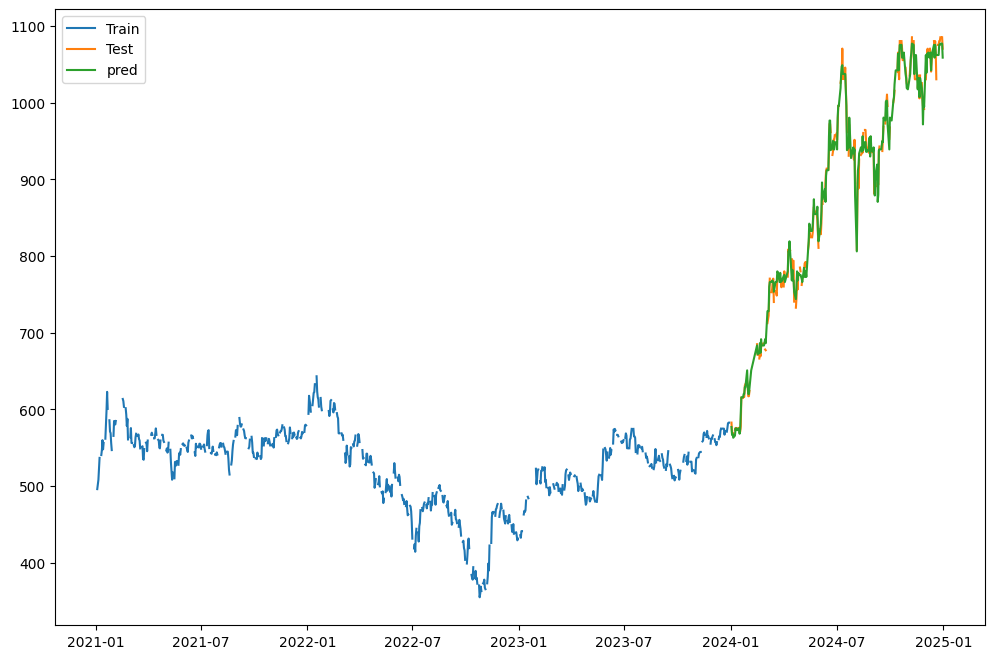

In [13]:
list7 = []

for i in range(len(test1B['T'])):
    list7.append(float(test1B.iloc[i].values))

trytopred = pd.DataFrame()
trytopred['X'] = list7
trytopred.dropna(axis = 0, how='any', inplace = True)
linear1 = test1B.copy()
linear1.dropna(axis = 0, how='any', inplace = True)
print(len(linear1))
print(len(trytopred))
y_pred = model1a.predict(trytopred)
linear1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(linear1.index, linear1['pred'], label='pred')
plt.legend(loc='best')
plt.show()

(-0.9753836234744065,
 0.7621363564361012,
 0,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 31.2466098872313)

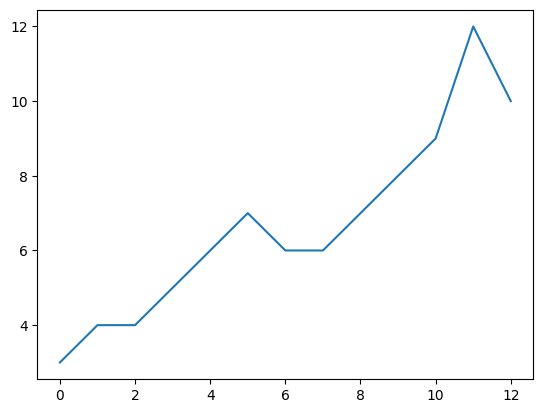

In [14]:
data = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

import matplotlib.pyplot as plt
plt.plot(data)
from statsmodels.tsa.stattools import adfuller  # perform augmented Dickey-Fuller test
adfuller(data)

In [15]:
!pip install numpy==1.24.4
!pip install pmdarima

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best model:  ARIMA(0,1,0)(0,0,0)[0]          


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


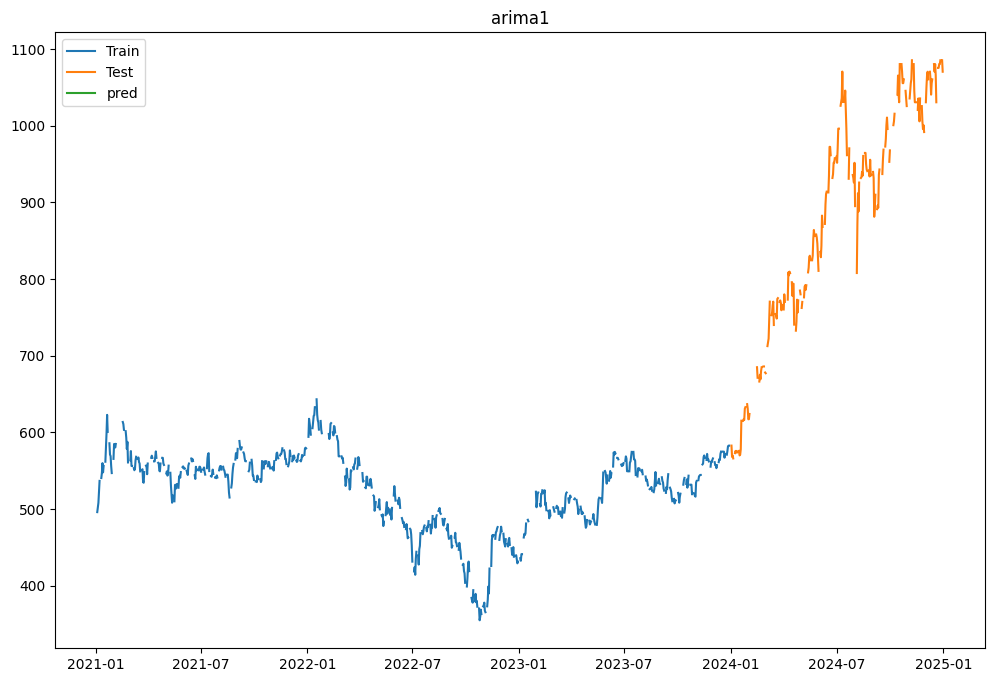

In [16]:
import pmdarima as pm
y = train1B['T'].dropna()
model = pm.auto_arima(y)
print('Best model:', model)
n_periods = 1047
y_pred = model.predict(n_periods)
arima1 = test1B.copy()
arima1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(arima1.index, arima1['pred'], label='pred')
plt.legend(loc='best')
plt.title("arima1")
plt.show()